In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
df=pd.read_csv('/content/gdrive/MyDrive/DATASET/iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,Nan,0.2,Iris-setosa
2,4.7,3.2,Nan,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [60]:
df.shape

(150, 5)

In [61]:
df.dtypes

sepal length    float64
sepal width     float64
petal length     object
petal width     float64
class            object
dtype: object

In [62]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [63]:
df=df.drop(df.index[[1,2,9]])

In [64]:
df.head(20)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [65]:
df['petal length']=df['petal length'].astype(float,errors='raise')

In [66]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  147 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


# Summary Statistics

In [68]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,147.000000,147.000000,147.000000,147.000000
mean,5.863946,3.053061,3.806803,1.219728
std,0.823536,0.437819,1.749390,0.756310
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
df['petal length'].value_counts()

1.5    13
1.4    11
5.1     8
4.5     8
1.6     7
5.6     6
1.3     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal length, dtype: int64

In [70]:
df['petal length'].unique()

array([1.4, 1.5, 1.7, 1.6, 1.1, 1.2, 1.3, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

# Data Visualization

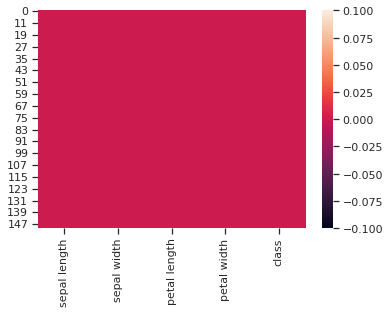

In [71]:
sns.heatmap(df.isnull())

In [72]:
#Correlation
dfcor=df.corr()
dfcor

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.108066,0.867481,0.811940
sepal width,-0.108066,1.000000,-0.425608,-0.360617
petal length,0.867481,-0.425608,1.000000,0.961435
petal width,0.811940,-0.360617,0.961435,1.000000


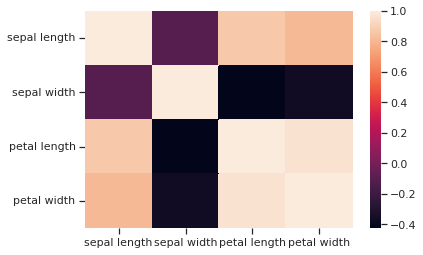

In [73]:
sns.heatmap(dfcor)

In [74]:
#sns.heatmap?

In [75]:
#sns.color_palette?

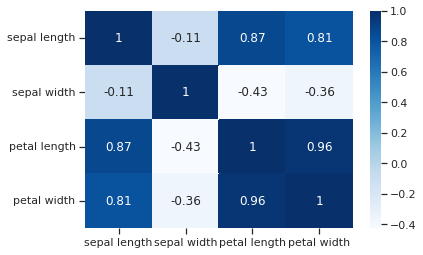

In [76]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues', annot=True)
#annot=True (for showing correlation value)

# ploting outlier

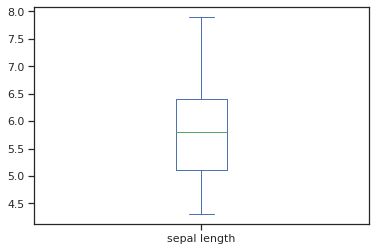

In [77]:
df['sepal length'].plot.box()

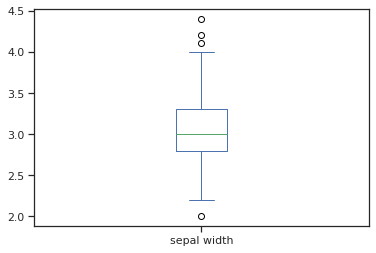

In [78]:
df['sepal width'].plot.box()

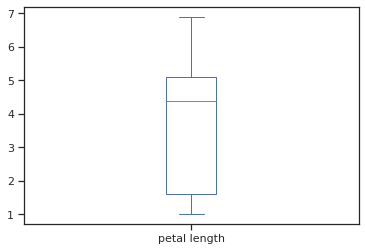

In [79]:
df['petal length'].plot.box()

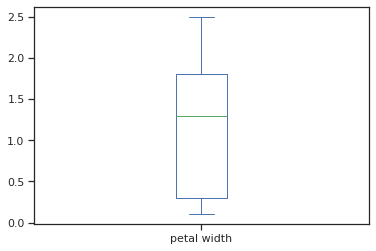

In [80]:
df['petal width'].plot.box()

# Distribution of Skewness

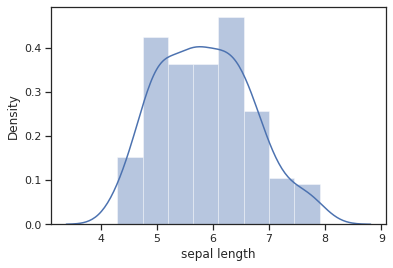

In [81]:
sns.distplot(df['sepal length'])

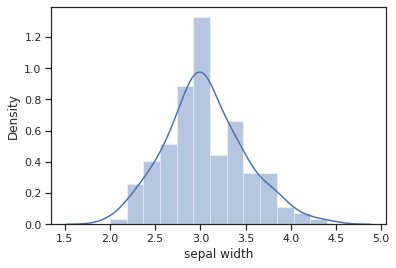

In [82]:
sns.distplot(df['sepal width'])

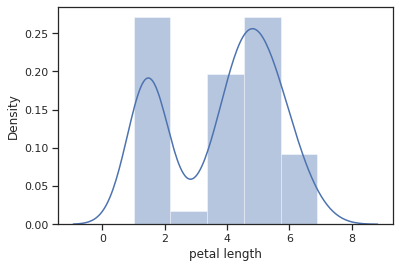

In [83]:
sns.distplot(df['petal length'])

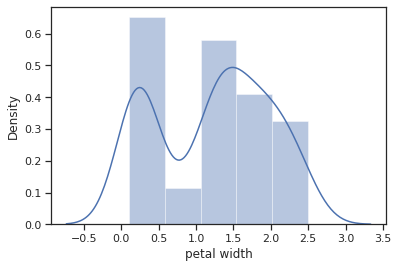

In [84]:
sns.distplot(df['petal width'])

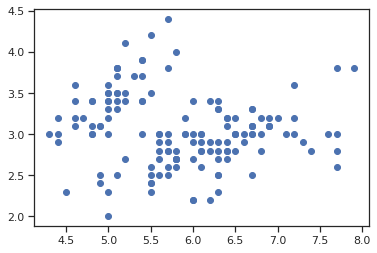

In [85]:
plt.scatter(df['sepal length'], df['sepal width'])

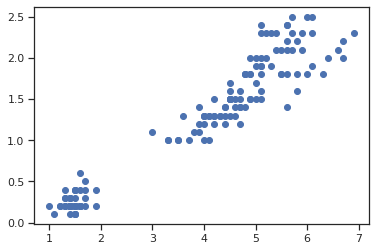

In [86]:
plt.scatter(df['petal length'], df['petal width'])

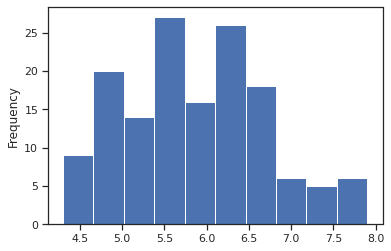

In [87]:
df['sepal length'].plot.hist()

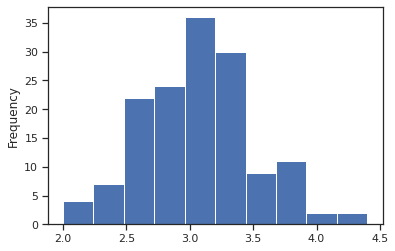

In [88]:
df['sepal width'].plot.hist()

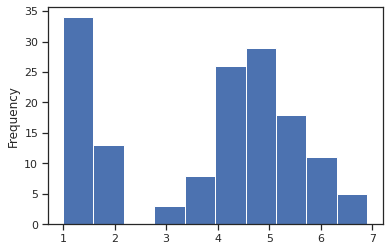

In [89]:
df['petal length'].plot.hist()

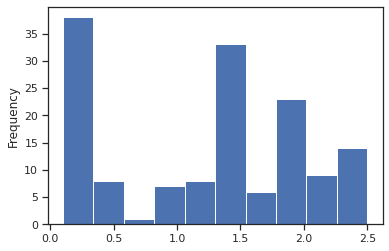

In [90]:
df['petal width'].plot.hist()

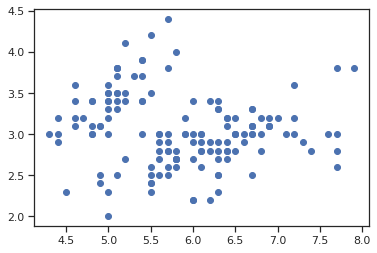

In [92]:
plt.scatter(df['sepal length'], df['sepal width'])
plt.show()

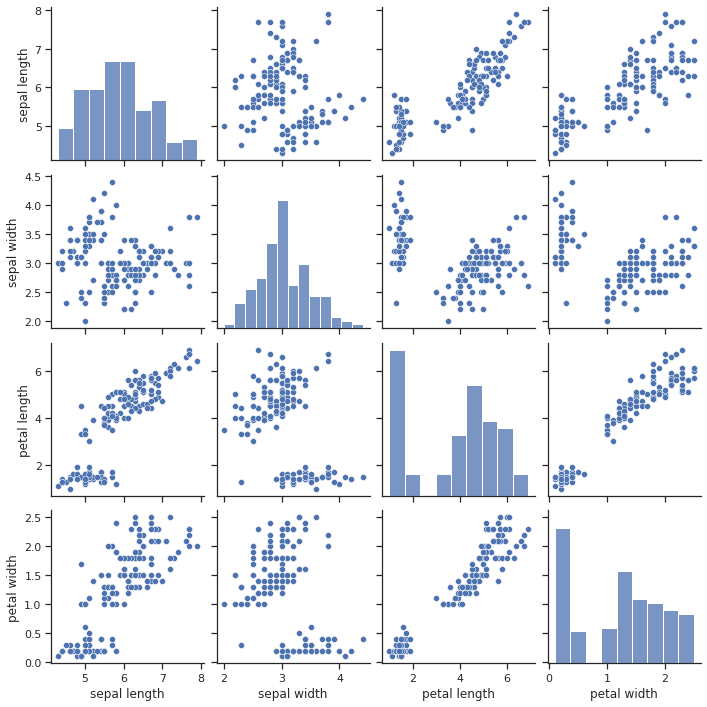

In [93]:
sns.pairplot(df)

In [94]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [95]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [96]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

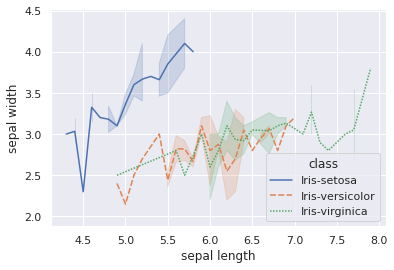

In [97]:

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="sepal length", y="sepal width",
             hue="class", style="class",
             data=df)

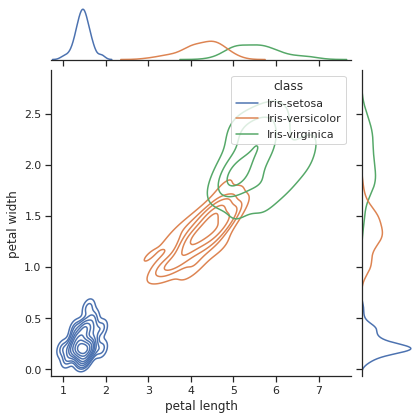

In [98]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
#penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="petal length", y="petal width", hue="class",
    kind="kde",
)

[Text(0, 0.5, '')]

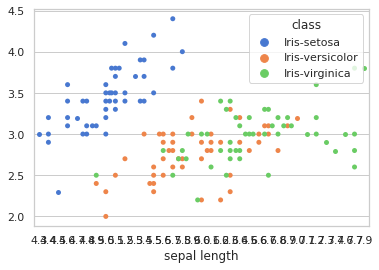

In [99]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="sepal length", y="sepal width", hue="class")
ax.set(ylabel="")

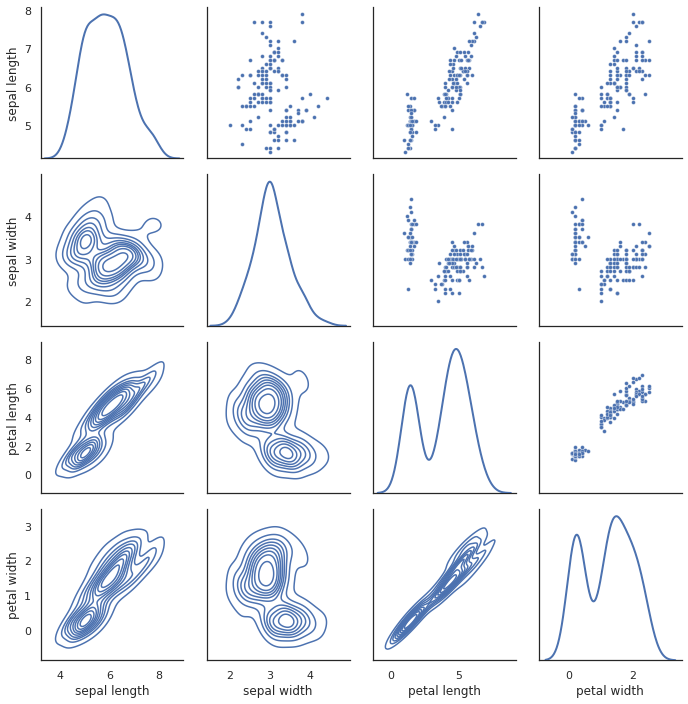

In [100]:
import seaborn as sns
sns.set_theme(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)